In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, tree

In [2]:
data = pd.read_csv('films.csv')
df = pd.read_csv('films.csv')

In [3]:
df['watching'].value_counts()

yes    26
no     24
Name: watching, dtype: int64

In [4]:
df.loc[df['gender'] == 'M', ['watching']].count()

watching    28
dtype: int64

In [5]:
df.loc[df['gender'] == 'M' && df['watching'] == 'yes', ['watching']].count()

SyntaxError: invalid syntax (<ipython-input-5-ed3101875ca3>, line 1)

In [6]:
male = df.loc[df['gender'] == 'M', ['watching']]
male

,watching
0,yes
1,yes
4,yes
5,yes
7,no
9,no
10,no
11,no
12,no
15,yes


In [7]:
female = df.loc[df['gender'] == 'F', ['watching']]

m_w = male[df['watching'] == 'yes'].count()
f_w = female[df['watching'] == 'yes'].count()

m_f_w = pd.DataFrame(
    data = [
        [m_w, male.count()-m_w],
        [f_w, female.count()-f_w],        
    ],
    columns=['yes', 'no'],
    index=['male', 'female']
)

/home/test/miniconda3/envs/newml/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/test/miniconda3/envs/newml/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [8]:
m_f_w

,yes,no
male,watching 12 dtype: int64,watching 16 dtype: int64
female,watching 14 dtype: int64,watching 8 dtype: int64


In [9]:
mf_w = pd.crosstab(index=df['gender'], columns=data['watching'])
mf_w

watching,no,yes
gender,,
F,8,14
M,16,12


In [10]:
p_m_w = 12/28
p_f_w = 14/22
print(p_f_w, p_m_w)

0.6363636363636364 0.42857142857142855


In [11]:
g_m_w = 2*p_m_w*(1-p_m_w)
g_f_w = 2*p_f_w*(1-p_f_w)

print(g_f_w, g_m_w)

0.4628099173553719 0.48979591836734687


In [12]:
w_g_g = ((28/50)*(g_m_w)) + ((22/50)*(g_f_w))
w_g_g

0.47792207792207797

In [13]:
es_w = pd.crosstab(index=df['employment_status'], columns=data['watching'])
es_w

watching,no,yes
employment_status,,
student,5,4
working,19,22


In [14]:
p_s_w = 4/9
p_w_w = 19/41

g_s_w = 2*p_s_w*(1-p_s_w)
g_w_w = 2*p_w_w*(1-p_w_w)

w_g_es = ((9/50)*(g_s_w)) + ((41/50)*(g_w_w))
w_g_es

0.4966937669376694

In [15]:
a_w = pd.crosstab(index=df['is_28+'], columns=data['watching'])
a_w

watching,no,yes
is_28+,,
0,11,17
1,13,9


In [16]:
p_i_w = 17/28
p_n_w = 9/22

g_i_w = 2*p_i_w*(1-p_i_w)
g_n_w = 2*p_n_w*(1-p_n_w)

w_g_a = ((28/50)*(g_i_w)) + ((22/50)*(g_n_w))
w_g_a

0.4798701298701299

In [17]:
e_m = -p_m_w*np.log2(p_m_w) - (1-p_m_w)*np.log2(1-p_m_w)

In [18]:
e_m

0.9852281360342515

In [19]:
-(26/50)*np.log2(26/50)-(24/50)*np.log2(24/50)

0.9988455359952018

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(df.iloc[:, :-1], df.iloc[:, -1])

In [21]:
dtc = DecisionTreeClassifier()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le_g = LabelEncoder()
xtrain['gender'] = le_g.fit_transform(xtrain['gender'])
xtest['gender'] = le_g.fit_transform(xtest['gender'])

In [24]:
le_es = LabelEncoder()
xtrain['employment_status'] = le_es.fit_transform(xtrain['employment_status'])
xtest['employment_status'] = le_es.fit_transform(xtest['employment_status'])

In [25]:
le_w = LabelEncoder()
ytrain = le_w.fit_transform(ytrain)
ytest = le_w.fit_transform(ytest)

In [26]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
p = dtc.predict(xtest)

In [28]:
accuracy_score(p, ytest)

0.6923076923076923

In [29]:
accuracy_score(ytest, p)

0.6923076923076923

In [30]:
import pydotplus as pdp

In [31]:
import graphviz as gz
from IPython.display import Image

In [32]:
from sklearn import tree

In [37]:
fname = ['gender', 'is_28+', 'emp_status']
cname = ['watching_yes', 'watching_no']

tree.export_graphviz(dtc, out_file='tree.dot', filled=True, rounded=True, special_characters=True,
                     feature_names=fname, class_names=cname)
graph = pdp.graph_from_dot_file('tree.dot')

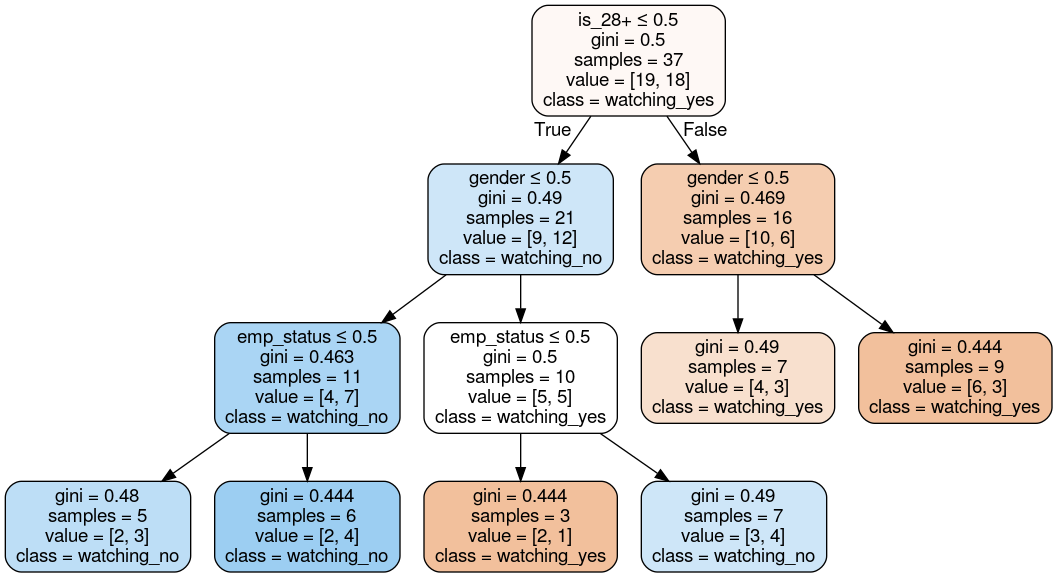

In [38]:
Image(graph.create_png())